In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Fifa Dataset

#### The dataset consists of player information, which includes height; weight overall rating, potential etc.

In [2]:
fifa=pd.read_csv(r'C:\Users\SUHANSHU\Downloads\Statistics Mini Project (1)\Statistics Mini Project\fifa_stats.csv')

In [3]:
# First Five rows of the data
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
# Info of the Data
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [5]:
# Summary Statistics
fifa.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [6]:
# Shape of the Data
fifa.shape

(2000, 15)

In [7]:
# Checking for missing values
fifa.isnull().sum()
# We See that we have 19 missing values in the club column.
# These players may be free agents and we may handle these missing values accordingly

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [8]:
# co-relation matrix
fifa.corr()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
Age,1.000000,0.063348,-0.511339,0.314808,-0.060940,-0.206624,-0.039370,0.065510,0.151674
Overall_rating,0.063348,1.000000,0.732695,0.661603,0.103579,0.081593,-0.094865,0.041815,0.055342
Potential,-0.511339,0.732695,1.000000,0.327717,0.099179,0.127366,-0.037827,0.030624,-0.017228
International Reputation,0.314808,0.661603,0.327717,1.000000,0.105748,0.088652,-0.032622,0.041700,0.071167
Weak Foot,-0.060940,0.103579,0.099179,0.105748,1.000000,0.342505,0.038840,-0.187942,-0.201137
Skill Moves,-0.206624,0.081593,0.127366,0.088652,0.342505,1.000000,0.065322,-0.472939,-0.528310
Jersey Number,-0.039370,-0.094865,-0.037827,-0.032622,0.038840,0.065322,1.000000,0.005081,-0.015377
Height,0.065510,0.041815,0.030624,0.041700,-0.187942,-0.472939,0.005081,1.000000,0.544016
Weight,0.151674,0.055342,-0.017228,0.071167,-0.201137,-0.528310,-0.015377,0.544016,1.000000


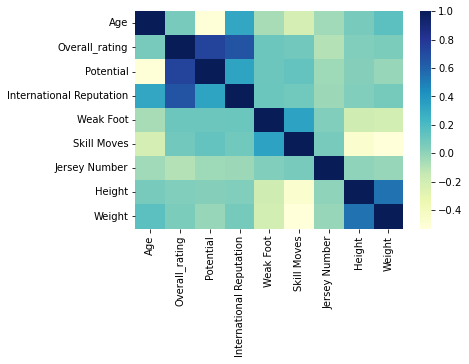

In [9]:
# Visualisation of the cor-relation matrix
sns.heatmap(fifa.corr(),cmap='YlGnBu')
plt.show()

## Handling Missing Values

In [10]:
# We would be handling the missing values before starting our basic EDA process.
# This would more likely give us better statistical results
# There are 19 missing values in the club column
# we would first check those entries
fifa.loc[fifa.Club.isnull(),:]

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
452,L. Paredes,24,Argentina,80,85,NaN,Right,2,4,4,Medium/ Medium,CM,5,5.083333,165
538,A. Granqvist,33,Sweden,80,80,NaN,Right,2,4,2,High/ Medium,LCB,4,6.333333,185
568,A. Lunev,26,Russia,79,81,NaN,Right,1,3,1,Medium/ Medium,GK,12,6.166667,176
677,I. Smolnikov,29,Russia,79,79,NaN,Right,2,3,3,High/ High,RB,2,5.083333,154
874,A. Dzyuba,29,Russia,78,78,NaN,Right,2,3,3,High/ Medium,ST,22,6.416667,201
953,LuÃ­s Neto,30,Portugal,77,77,NaN,Right,1,3,2,Medium/ Medium,CB,4,6.166667,157
997,D. Kuzyaev,25,Russia,77,80,NaN,Right,1,3,3,Medium/ High,RM,7,6.000000,163
1008,G. Sio,29,Ivory Coast,77,77,NaN,Left,2,3,3,High/ Low,ST,21,5.083333,176
1120,J. Villar,41,Paraguay,77,77,NaN,Right,2,3,1,Medium/ Medium,GK,1,5.083333,187
1271,C. Riveros,35,Paraguay,76,76,NaN,Right,1,3,3,Medium/ Medium,CAM,16,5.083333,163


In [11]:
# We don't have much else indication of what could be the clubs that are missing
# So we would fill the none values with 'Free Agent'
# This would ensure there are no null values in the data
fifa.loc[fifa.Club.isnull(),'Club']='Free Agent'

In [12]:
# Checking for missing values again
fifa.isnull().sum()
# Thus Data has no missing values now

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

## Basic Exploratory Data Analysis

In [13]:
fifa.select_dtypes(include=np.number).drop(columns='Jersey Number').columns

Index(['Age', 'Overall_rating', 'Potential', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Height', 'Weight'],
      dtype='object')

In [14]:
nums=['Age', 'Overall_rating', 'Potential', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Height', 'Weight'] # These are all the numerical columns

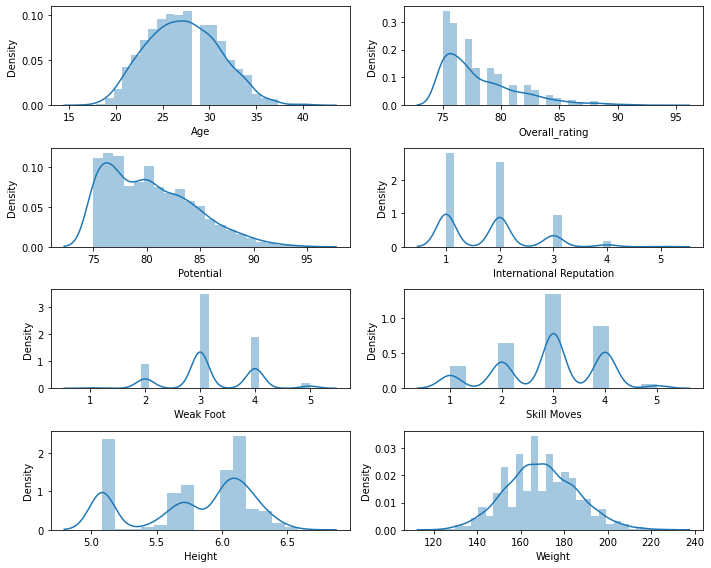

In [15]:
rows=4
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(fifa[i])
    counter+=1

plt.tight_layout()
plt.show()

In [16]:
fifa.select_dtypes(include=object).drop(columns='Name').columns

Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Position'], dtype='object')

In [17]:
cats=['Preferred Foot', 'Work Rate', 'Position'] # all categorical columns( we will plot clubs and nationality separately because of too many unique values)

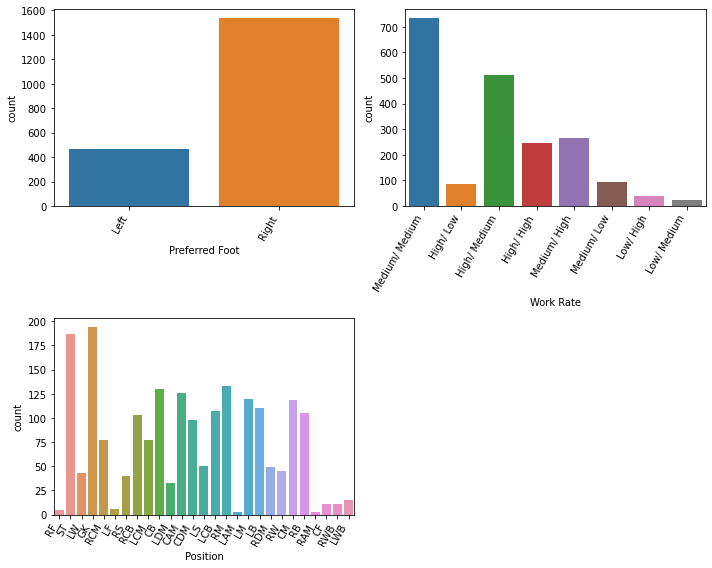

In [18]:
rows=2
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in cats:
    plt.subplot(rows,cols,counter)
    sns.countplot(fifa[i])
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

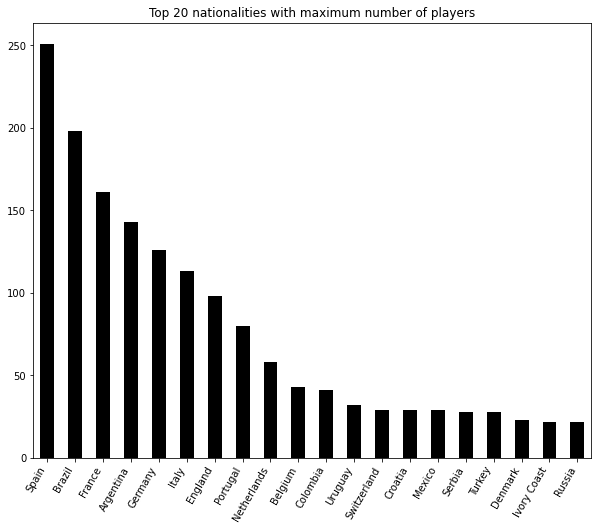

In [19]:
fifa.Nationality.value_counts().sort_values(ascending=False).head(20).plot.bar(color='black')
plt.title('Top 20 nationalities with maximum number of players')
plt.xticks(rotation=60,ha='right')
plt.show()

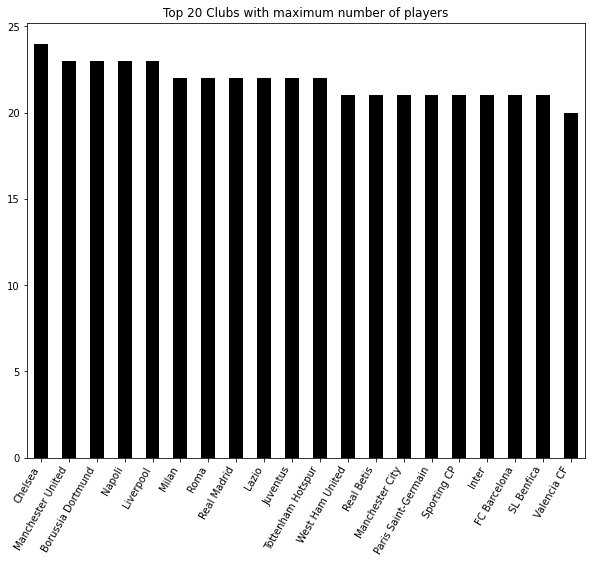

In [20]:
fifa.Club.value_counts().sort_values(ascending=False).head(20).plot.bar(color='black')
plt.title('Top 20 Clubs with maximum number of players')
plt.xticks(rotation=60,ha='right')
plt.show()

## Inferences from the basic Ananlysis

* Age Column seems to be normally distributed
* Overall rating seems to be right-skewed
* Potential seems to be right-skewed as well
* Internationtional reputaion seems to be multimodal with spikes at discrete points. It could indicate the column as discrete
* Weak foot and skill moves seem to be multimodal and discrete as well
* Height seems to be multimodal but not discrete
* Weight seems to be normally distributed
* There are more right-footed players than left footed
* Medium/Medium seems to be the most frequent work rate
* GK is the most common position in the data

## Statistical Analysis

#### Q1: a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [21]:
# For the following statistical analysis we would assumes all the given distributions as normal and equality of variances hold
# We would perform the analysis on a 5% significance level

In [22]:
import random
mew=fifa.Age.mean() # Population mean
sample1=random.sample(sorted(fifa.Age),200) # Random sample of size 200 from the Age column
n=200 # Size of the sample
popsd=fifa.Age.std() # Population standard deviation
se=popsd/np.sqrt(n) # Standard error of the sample
xbar=np.mean(sample1) # Sample mean
samplesd=np.std(sample1) # Sample standard deviation
print('Population Mean:',mew)
print('Sample mean:',xbar)
print('Population Standard Deviation:',popsd)
print('Sample Standard Deviation:', samplesd)
print('Standard Error:',se)

Population Mean: 27.2315
Sample mean: 27.315
Population Standard Deviation: 3.8590612753574423
Sample Standard Deviation: 3.912259577277561
Standard Error: 0.2728768396819654


In [23]:
# Central Limit Theorem States that the distribution of sample means approximates the population mean
# as the sample size increases and a sample of sample size greater than 30 is assumed to be normally distributed

In [24]:
# The estimated standard error of a sample mean tends to decrease with increase in sample size
# This is because as the sample size increases the distribution of the sample becomes closer(or more identical)
# to the distribution of the population
# Hence we observe that the estimated standard error decreases with increase in sample size

#### b)Is there any evidence that the players overall rating is greater than 80?

In [25]:
# Test this we will define our null hypothesis
# Null Hypothesis: Average overall rating=80
# Alternative Hypothesis: Average overall rating!=80
stats.ttest_1samp(fifa.Overall_rating,80)

Ttest_1sampResult(statistic=-24.538460498672062, pvalue=1.885376780327322e-116)

In [26]:
# From the above test we see that our pvalue is extremely small compared to the significance level
# Hence we would reject our Null Hypothesis. Thus Average overall rating is not equal to 80
# We also see that our test statistic is negative which means that our actual mean is less than 80 and not greater than 80

#### c)Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

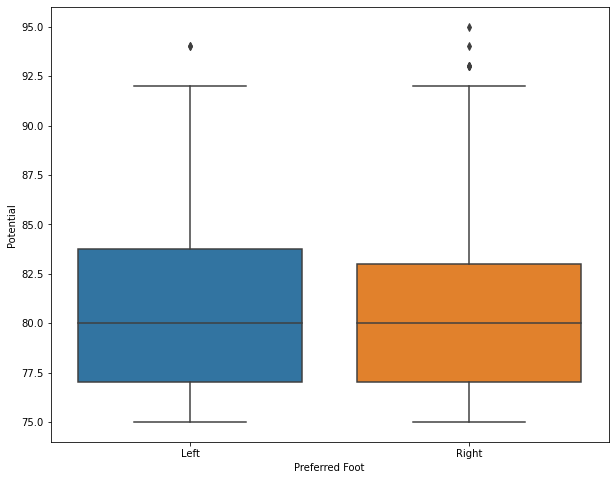

In [27]:
# Graphically we would make a boxplot 
sns.boxplot(x='Preferred Foot',y='Potential',data=fifa)
plt.show()

In [28]:
# From the above boxplot it seems that the potential of left-footed players are slightly higher than the right-footed player
# To test this we would apply a two sample t-test

In [29]:
# Null Hypothesis: Preffered foot has no effect on potential
# Alternate Hypothesis: Preferred foot has an effect on potential
right=fifa.loc[fifa['Preferred Foot']=='Right','Potential']
left=fifa.loc[fifa['Preferred Foot']=='Left','Potential']
stats.ttest_ind(right,left)

Ttest_indResult(statistic=-1.5378037422592814, pvalue=0.12425494914461453)

In [30]:
# Since this was a two tail test the significance level in this case would 0.025
# From the ttest we get that the pvalue is significantly bigger than the significance level
# Hence we fail to reject our null hypothesis
# Andthus our conclusion is that the preferred foot has no effect on potential

#### d)Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [31]:
# To check the relation between the overall rating and potential, we would apply a 2 sample ttest
# Null Hypothesis: Overall rating and Potential have no relation
# Alternate Hypothesis: Overall rating and potential have a relationship

In [32]:
stats.ttest_ind(fifa.Overall_rating,fifa.Potential)

Ttest_indResult(statistic=-17.89175319557915, pvalue=6.241604310936382e-69)

In [33]:
# From the statistical test we see that the p value is extremely small than our significance level
# Hence we reject our null hypothesis
# Thus our conclusion would be that the Overall rating and Potential are related

#### e)Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

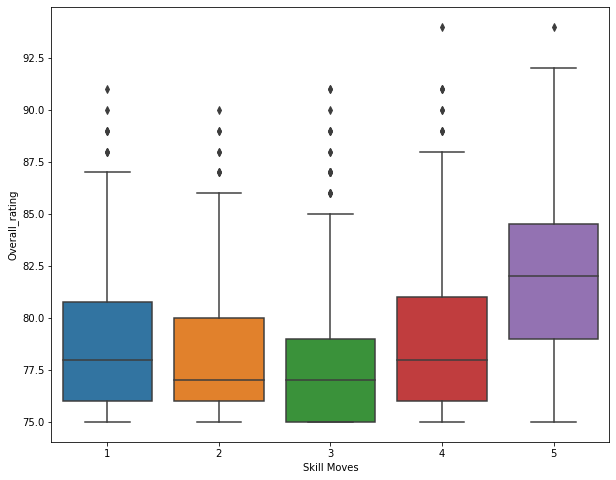

In [34]:
# For graphical analysis we would be making a boxplot
sns.boxplot(x='Skill Moves',y='Overall_rating',data=fifa)
plt.show()

In [35]:
# From the above boxplot we can see that 5 skill move palyers have the highest overalls 
# This also indicates a relationship between overall_rating and skill moves
# We would further statistically test the hypothesis

In [36]:
# Null Hypothesis: Skill move has no effect on Overall Rating
# Alternate Hypothesis: Skill move has an effect on Overall rating
# We would apply a two sample ttest to apply test our hypothesis
stats.ttest_ind(fifa['Skill Moves'],fifa.Overall_rating)

Ttest_indResult(statistic=-983.0720466249821, pvalue=0.0)

In [37]:
# Here we get a pvalue of 0 which is less than our significance level
# Hence we reject our null hypothesis
# which means that skill moves has an effect on the overall_rating

# Mobile Network Dataset

#### The given data set contains information about the internet, calls, and messages of various network.

In [38]:
df=pd.read_csv(r'C:\Users\SUHANSHU\Downloads\Statistics Mini Project (1)\Statistics Mini Project\phone.csv')

In [39]:
# First 5 rows of the data
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [40]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [41]:
# Summary statistics
df.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [42]:
# Shape of the data
df.shape

(820, 6)

In [43]:
# Checking for missing values
df.isnull().sum()
# Data has no missing values

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

## Basic Exploratory Data Analysis

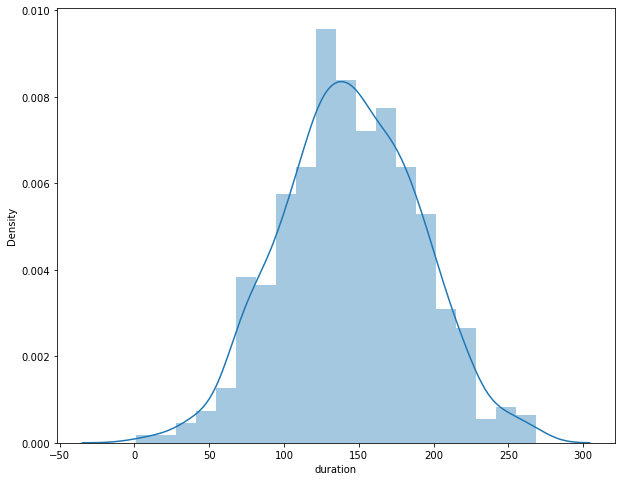

In [44]:
# The only numerical column in the data is the duration column
# So we would check the distribution of this column
sns.distplot(df.duration)
plt.show()

In [45]:
df.select_dtypes(include=object).drop(columns='date').columns

Index(['item', 'month', 'network', 'network_type'], dtype='object')

In [46]:
cats=['item', 'month', 'network', 'network_type']# All categorical columns

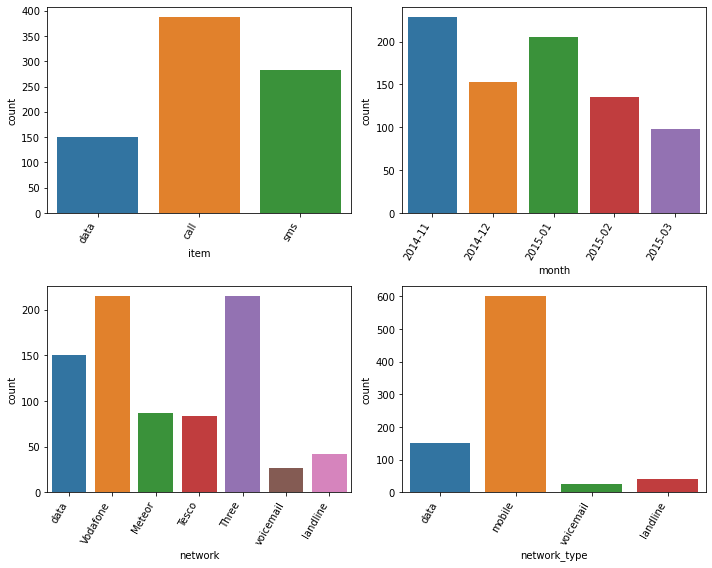

In [47]:
# Making multiple countplots
rows=2
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in cats:
    plt.subplot(rows,cols,counter)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

## Inferences from our Basic Exploratory Data Analysis

* The only numerical column in the data (duration) seems to be normally distributed
* The usage of calls is maximum compared to sms and internet data
* November 2014 seems to have been the busiest time in the data
* Vodafone leads in the count of usage
* Usage of mobile is substantially more compared to data, voicemail and landline

## Statistical Analysis

In [48]:
# The following statistical analysis would be done on a 5% significance level
# Tests for normality and equality of variance will be done wherever required

#### a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [49]:
# Testing normality of the duration column
stats.shapiro(df.duration)

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [50]:
# Here we have pvalue considerably larger than the significant levels of 0.05 and 0.01
# So we proceed with our 1 sample ttest

In [51]:
# For 95% confidence level
cl=0.95 # Confidence level
alpha=1-cl # Significance level
xbar=df.duration.mean()# Sample mean
n=len(df.duration) # Sample size
s=np.std(df.duration) # Sample Standard deviation
t_crit=stats.t.isf(alpha/2,n-1) # t_critical value. We are providing alpha/2 since it's a two-tail test
se=s/np.sqrt(n) # Standard error
ci_95=(xbar-t_crit*se,xbar+t_crit*se) # Confidence interval for 95% confidence level

In [52]:
# For 95% confidence level
cl=0.99 # Confidence level
alpha=1-cl # Significance level
xbar=df.duration.mean()# Sample mean
n=len(df.duration) # Sample size
s=np.std(df.duration) # Sample Standard deviation
t_crit=stats.t.isf(alpha/2,n-1) # t_critical value. We are providing alpha/2 since it's a two-tail test
se=s/np.sqrt(n) # Standard error
ci_99=(xbar-t_crit*se,xbar+t_crit*se) # Confidence interval for 95% confidence level

In [53]:
ci_95,ci_99

((141.17512177828408, 147.43474934138683),
 (140.188148607254, 148.42172251241692))

In [54]:
# As we can clearly see, the confidence interval for 99% confidence level is wider than the confidence interval for 95%
# This means that as the confidence level increases, our confidence interval increases

#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

#### c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

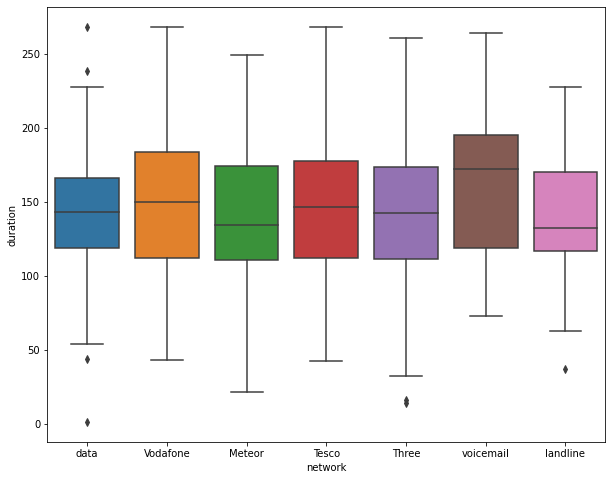

In [55]:
# We will use boxplot to plot the distribution of duration with respect to each network
sns.boxplot(x='network',y='duration',data=df)
plt.show()

#### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [56]:
# If item and duration have no relation then the mean should be uniform across all the groups in item column

In [57]:
# finding unique values in 
df.item.unique()

array(['data', 'call', 'sms'], dtype=object)

In [58]:
# Grouping the duration columns
data=df.loc[df.item=='data','duration']
call=df.loc[df.item=='call','duration']
sms=df.loc[df.item=='sms','duration']

In [59]:
# Normality test
stats.shapiro(data),stats.shapiro(call),stats.shapiro(sms)

(ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596),
 ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708),
 ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526))

In [60]:
# From the above test we can say that all three samples 
# are normally distributed as the pvalues are greater than the significance level of 0.05
# Now we will check for equality of variance
# For that we will apply the Levene's test
stats.levene(sms,call,data)

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)

In [61]:
# From the above levene test we can see that the 3 samples do not satisfy the equality of variances
# Hence we cannot apply any parametric tests on them
# Thus we would have to perform non-parametric tests on the three groups
# For this we would use the Kruskal-Wallis H-Test

In [62]:
# Null Hypothesis: Item has no impact on duration
# Alternate Hypothesis: Item has an impact on duration
stats.kruskal(data,call,sms) # Kruskal Wallis H-Test

KruskalResult(statistic=3.5659414348706377, pvalue=0.16813791437741693)

In [63]:
# Here the pvalue is greater than our significance level of 0.05
# Thus we fail to reject the null hypothesis
# Hence we come to the conclusion that Item has no impact on duration 

#### e)	Perform statistical tests to identify the relation between network and network_type. 

In [64]:
# Here we will perform the chi2_contingency test
# For that first we need to make a crosstab betwwen the given two variables
data=pd.crosstab(df.network,df.network_type) # Required crosstab

In [65]:
# Null Hypothesis: network and network_type have no relation
# Alternate Hypothesis: network and network_type have a relation
# Now we will extract the pvalue from chi2_contingency test
test_statistic,pvalue,dof,exp=stats.chi2_contingency(data)
pvalue

0.0

In [66]:
# From the above test we get a pvalue of 0
# Hence we have reject our null hypothesis and hold the alternative hypothesis as true
# Thus we conclude that network and network_type have a relation